## Visualizing trends in Forest Area in countries across the world

In [8]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime
import scipy
from scipy.stats import pearsonr
import seaborn as sns

plt.style.use('classic')
plt.rcParams['figure.figsize'] = (10, 8)

In [2]:
idf = pd.read_csv('world-development-indicators/Indicators.csv')
tdf = pd.read_csv('GlobalLandTemperatures/GlobalLandTemperaturesByCountry.csv')
tdf_world = pd.read_csv('GlobalLandTemperatures/GlobalTemperatures.csv')
tdf_world['Country'] = 'World'
tdf_world['AverageTemperature'] = tdf_world['LandAverageTemperature']
cdf = pd.read_csv('world-development-indicators/Country.csv')
adf = pd.read_csv('phys_geo/phys_geo.csv')
cig_df = cdf[['CountryCode', 'TableName', 'IncomeGroup']]

In [3]:
idf.head()

,CountryName,CountryCode,IndicatorName,IndicatorCode,Year,Value
0,Arab World,ARB,"Adolescent fertility rate (births per 1,000 wo...",SP.ADO.TFRT,1960,1.335609e+02
1,Arab World,ARB,Age dependency ratio (% of working-age populat...,SP.POP.DPND,1960,8.779760e+01
2,Arab World,ARB,"Age dependency ratio, old (% of working-age po...",SP.POP.DPND.OL,1960,6.634579e+00
3,Arab World,ARB,"Age dependency ratio, young (% of working-age ...",SP.POP.DPND.YG,1960,8.102333e+01
4,Arab World,ARB,Arms exports (SIPRI trend indicator values),MS.MIL.XPRT.KD,1960,3.000000e+06


In [4]:
tdf['date'] = pd.to_datetime(tdf['dt'])
tdf['Year'] = tdf['date'].dt.year
tdf['Month']= tdf['date'].dt.month

tdf_world['date'] = pd.to_datetime(tdf_world['dt'])
tdf_world['Year'] = tdf_world['date'].dt.year
tdf_world['Month']= tdf_world['date'].dt.month

indicator_dict = {
    'CO2': {
        'indicator': 'EN.ATM.CO2E.KT',
        'ind_name': 'CO2 Emission',
    },
    'FA': {
        'indicator': 'AG.LND.FRST.K2',
        'ind_name': 'Forest Area % Land',
    },
    'EC': {
        'indicator': 'EG.ELC.COAL.ZS',
        'ind_name': 'Electriciy from Coal'
    },
    'METH': {
        'indicator': 'EN.ATM.METH.KT.CE',
        'ind_name': 'Methane Emission'
    },
}

In [23]:
def plot_correlation(idf, tdf, country, indicator_dict):
    """
    Function used to plot the correlation between temperature data and CO2 emissions over time.
    """
    indicator = indicator_dict['indicator']
    ind_name = indicator_dict['ind_name']
    df_indicator = idf[(idf.IndicatorCode == indicator) & (idf.CountryName == country)].sort_values('Year')
    df_temp = tdf[(tdf.Country == country) & (tdf.Year >= 1960)].dropna().groupby(['Year']).mean().reset_index('Year').sort_values('Year')
    df_combined = pd.merge(df_indicator, df_temp, on='Year')
    title = '{0} {1} | Pearsonr: {2:.2f}'.format(country, ind_name, pearsonr(df_combined.Value, df_combined.AverageTemperature)[0])
    ax = df_combined.plot(x='Year', y='Value', kind='scatter', 
                          c='AverageTemperature', s=100, xlim=(1950, 2020), title=title)
    ax.set_xlabel("Year")
    ax.set_ylabel(ind_name)
    
def plot_trend(idf, tdf, country, indicator_dict):
    """
    Function used to plot the correlation between temperature data and CO2 emissions over time.
    """
    indicator = indicator_dict['indicator']
    ind_name = indicator_dict['ind_name']
    df_indicator = idf[(idf.IndicatorCode == indicator) & (idf.CountryName == country)].sort_values('Year')
    sns.lmplot(x='Year', y='Value', data=df_indicator)
    sns.plt.title('{}'.format(country))
    
def clean_country_list(country_list):
    cleaned_countries = []
    for country in country_list:
        splits = country.split(',')
        cleaned_countries.append(splits[0])
    return cleaned_countries

def get_regional_df(country_list, region_name):
    """
    Samples and aggregates data over a specific region and returns dataframes that can be used by plot_correlation
    """
    cleaned_countries = clean_country_list(country_list)
    idf_reg = idf[idf.CountryName == region_name]
    tdf_reg = tdf[tdf.Country.isin(cleaned_countries)].groupby('Year').mean().reset_index('Year')
    tdf_reg['Country'] = region_name
    return idf_reg, tdf_reg

In [24]:
developing_countries = ['India', 'Brazil', 'Mexico', 'China', 'South Africa']
eurozone_countries = ['United Kingdom', 'Germany', 'Sweden', 'Switzerland', 'Finland']
north_america_countries = ['Canada', 'United States']

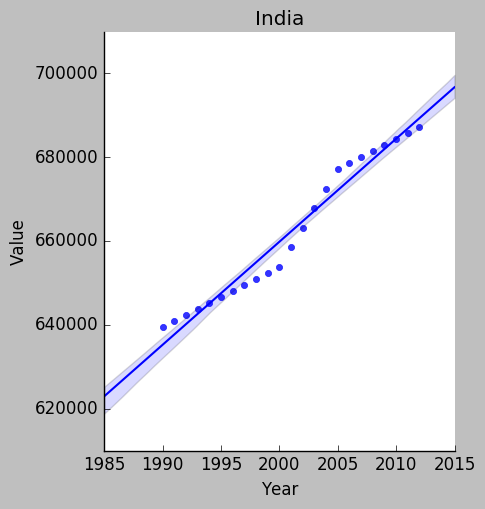

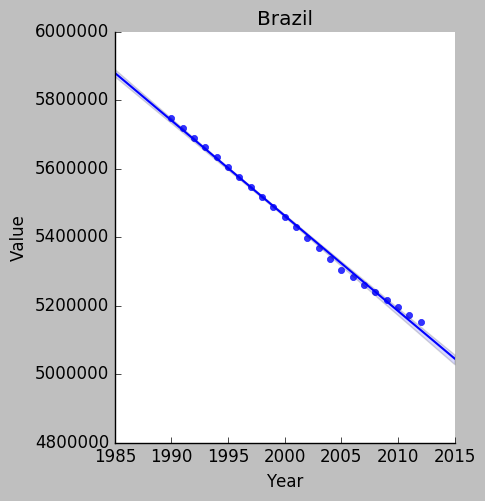

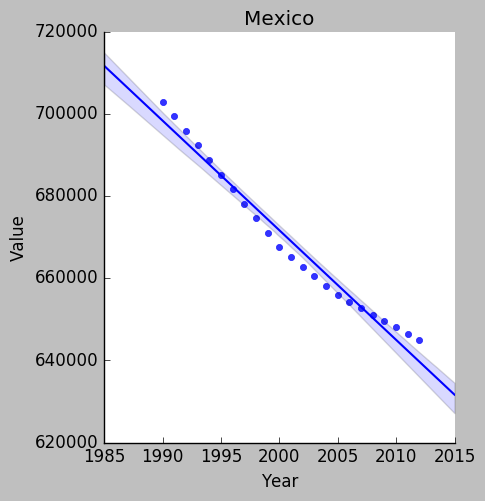

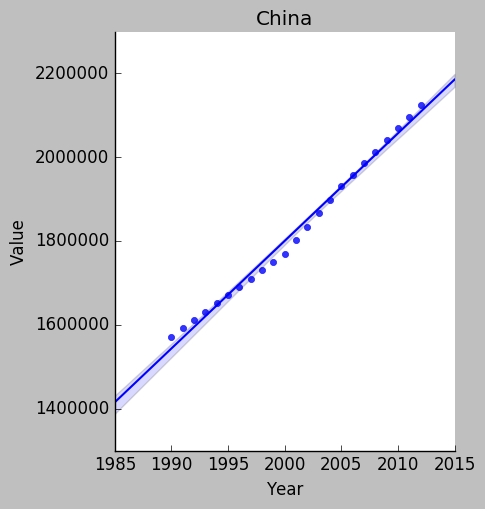

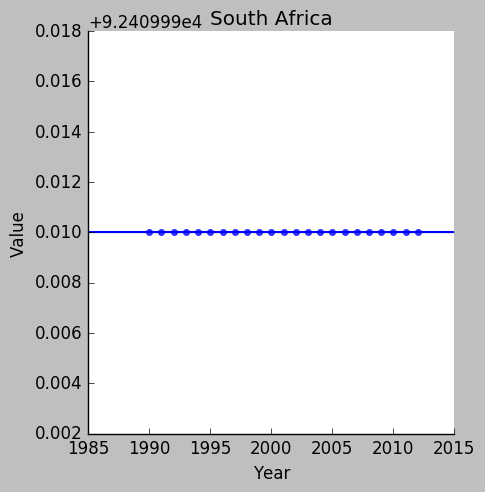

In [25]:
for country in developing_countries:
    plot_trend(idf, tdf, country, indicator_dict['FA'])

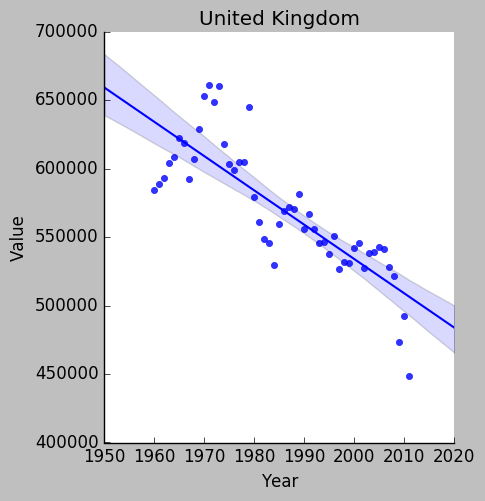

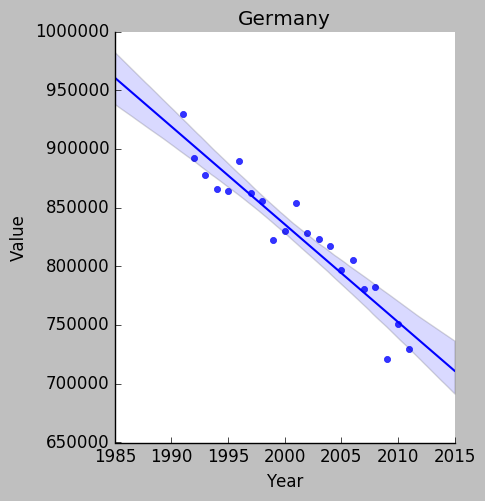

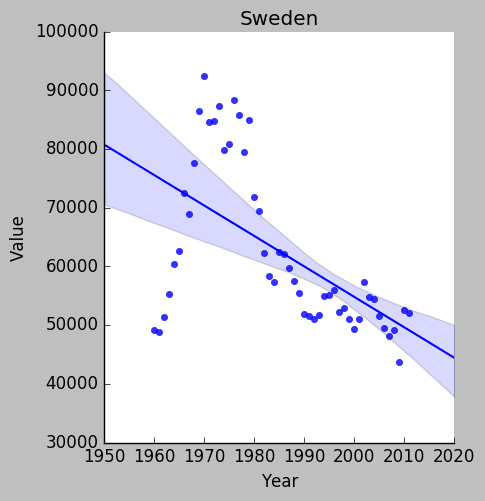

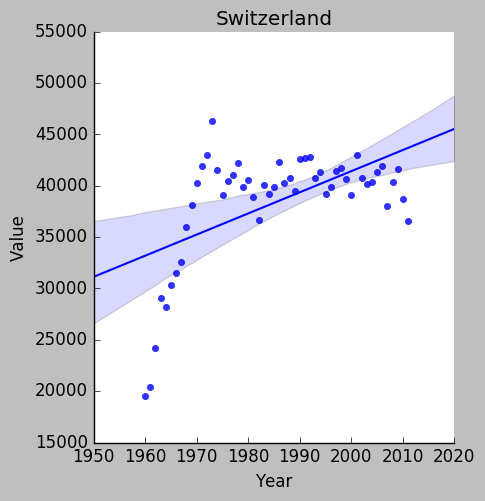

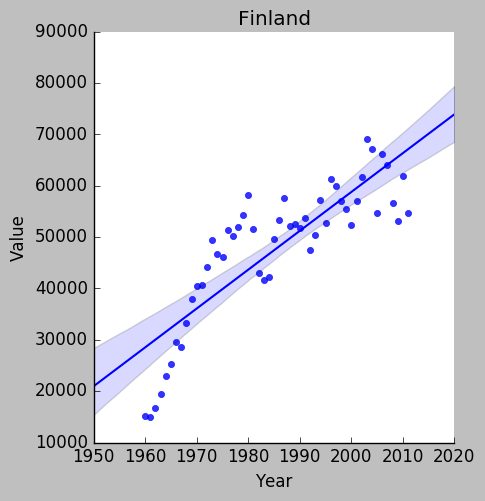

In [27]:
for country in eurozone_countries:
    plot_trend(idf, tdf, country, indicator_dict['CO2'])

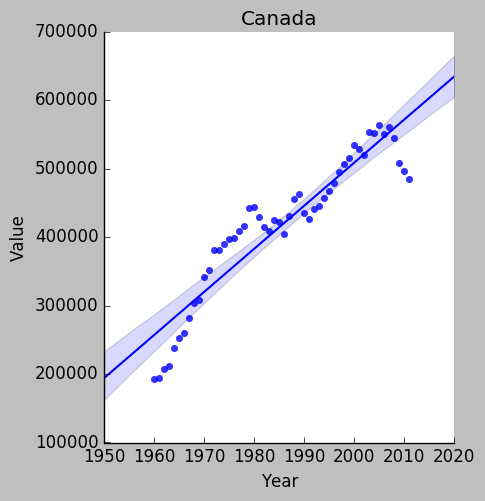

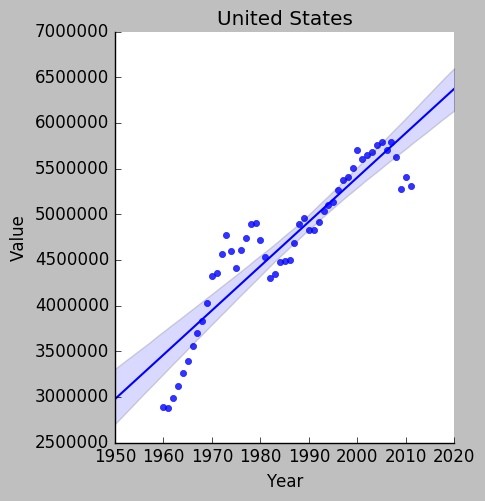

In [29]:
for country in north_america_countries:
    plot_trend(idf, tdf, country, indicator_dict['CO2'])